# Estudio sobre Q-Learning y algunas de sus variaciones

Este es el notebook que se ha utilizado para la realización del proyecto realizado por José Manuel Rojas Granado y Javier Solís García.

En la primera parte del notebook se muestra el código utilizado para la realización de los algoritmos:

1.  Q_Learning perteneciente a la fase 1 del proyecto
2.  Q_Learning perteneciente a la fase 2 del proyecto
3.  Algoritmo SARSA que se añadido como implementación del proyecto

En la segunda parte del notebook se encuentra la función main, en la que si se ejecuta se podrán introducir los diferentes datos y se podrá probar los diferentes ejemplos que se han adjuntado.

## Importación de librerias utilizadas

In [29]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

## Definición de la carga de datos

In [30]:
def cargar_datos_txt(fichero):
    path = os.path.join(os.getcwd(), fichero)
    lineas = csv.reader(open(path, newline='\n'))
    data = []
        
        
    for linea in lineas:
        fila = []
        for i in range(0, len(linea)):
            fila.append(int(linea[i]))
        data.append(fila)
        
    return data

In [31]:
def crear_matriz_recompensas(data, fin):
    
    cantidad = len(data)*len(data[0])
    
    lista = []
    for i in range(0, cantidad):
        lista.append([-1]*cantidad)
    
    #Definir vecinos
    for i in range(0, len(data)):
        
        for j in range(0, len(data[i])):
            actual = data[i][j]
            
        
            
            if len(data)  > i+1:
                vecino1 = data[i+1][j]
                if vecino1 == fin:
                    lista[actual][vecino1] = 100
                else:
                    lista[actual][vecino1] = 0
                    
            if 0 <= i-1:
                vecino2 = data[i-1][j]
                if vecino2 == fin:
                    lista[actual][vecino2] = 100
                else:
                    lista[actual][vecino2] = 0
                    
            if len(data[i]) > j+1:
                vecino3 = data[i][j+1]
                if vecino3 == fin:
                    lista[actual][vecino3] = 100
                else:
                    lista[actual][vecino3] = 0
                
            if 0 <= j-1:
                vecino4 = data[i][j-1]
                if vecino4 == fin:
                    lista[actual][vecino4] = 100
                else:
                    lista[actual][vecino4] = 0
            
    lista[fin][fin] = 100
    return lista
            
            
    

In [32]:
#Inicializa la matriz Q para el algorimo de Q-Learning, con los pesos de cada
#acción inicializados a 0
def inicializa_Q(recompensas):
   
    lista = []
    for i in range(0, len(recompensas)):
        lista.append([0]*len(recompensas))
     
    return lista 

In [33]:
def carga_matriz_recompensas(fichero):
    datos = cargar_datos_txt(fichero)
    return datos

In [2]:
def cargar_datos():
    
    tipo = int(input('''Si quieres que se genere la matriz de recompensas a partir de un tablero pulsa 0,
si quieres cargar tu matriz de recompensas pulsa 1: '''))
    
    inicio = int(input('Introduce el valor de la casilla de inicio: '))
    
    fin = int(input('Introduce el valor de la casilla objetivo: '))
    
    epochs = int(input('Introduce el número de episodios de entrenamiento: '))
    
    gamma = float(input('Introduce el valor del factor de aprendizaje gamma: '))
    
    tablero = str(input('Introduce el nombre del fichero desde el que quieres cargar la matriz del tablero: '))
    
    tablero = './' + tablero + '.txt'
    
    if tipo == 0:
        
        data = cargar_datos_txt(tablero)
    
        recompensas = crear_matriz_recompensas(data, fin)
    
        q = inicializa_Q(recompensas)
        
    else:
        
        data = cargar_datos_txt(tablero)
        
        recompensas = str(input('Introduce el nombre del fichero desde el que quieres cargar la matriz de recompensas: '))
    
        recompensas = './' + recompensas + '.txt'
        
        recompensas = cargar_datos_txt(recompensas)
        
        q = inicializa_Q(recompensas)
        
    
    return data, recompensas, q, inicio, fin, epochs, gamma

## Definición de algoritmo de Q-Learning Fase 1

In [35]:
def seleccionar_accion_aleatoria(valor, recompensas):
    aleatorio = -1
    while aleatorio == -1:
        casilla = np.random.randint(len(recompensas),size=1)[0]
        aleatorio = recompensas[valor][casilla]
        
    return casilla    

In [36]:
def calcula_rendimiento(q):
    suma = 0
    maximo=1
    for i in range(0, len(q)):
        suma+=sum(q[i])
        if maximo < max(q[i]):
            maximo = max(q[i])
    return (suma/maximo)*100   

In [37]:
def muestra_rendimiento(rendimiento):
    plt.title('Rendimiento del algoritmo de Q-Learning')
    plt.xlabel('Número de episodios de entrenamiento')
    plt.ylabel('Valor del rendimiento del algoritmo')
    plt.plot(rendimiento)
    plt.show()

In [1]:
def calcular_camino(q,inicio,fin):
    posicion = inicio
    camino = []
    camino.append(inicio)
    converge = True
    representacion = ''
    
    while posicion != fin:
        
        maximo = max(q[posicion])
        siguiente = q[posicion].index(maximo)
        posicion = siguiente
    
        if(posicion in camino):
            print('El algoritmo no ha encontrado un camino sin bucles')
            converge = False
            break

        camino.append(siguiente)
        
    for i in range(len(camino)):
        representacion += str(camino[i])+' -> '
        
    if(converge):    
        print('El camino óptimo es: ', representacion[0:-4])
        
    return camino, converge

In [39]:
def q_learning(data, recompensas, q, fin, epochs, gamma, bol_camino, inicio):
    rendimiento = []
    for epoch in range(0, epochs):
        
        print('Época = '+str(epoch), 'Completado al '+str((epoch/epochs)*100)+'%')
        i = np.random.randint(len(data) ,size=1)[0]
        j = np.random.randint(len(data[i]),size=1)[0]
        estado = data[i][j]
        primero = True
        
        while (estado != fin) or (primero):
            
            accion = seleccionar_accion_aleatoria(estado, recompensas)
            maximo = max(q[accion])
            q[estado][accion] = recompensas[estado][accion] + gamma*maximo
            estado = accion
            primero = False
            
        rendimiento.append(calcula_rendimiento(q))
        if bol_camino:
            calcular_camino(q, inicio, fin)
    print('Entrenamiento finalizado')
    return q, rendimiento

## Definición de algoritmo de Q-Learning Fase 2

In [40]:
def selecionar_accion_aleatoria_F2(estado, recompensas, q, epsilon):
    aleatorio = np.random.rand(1)[0]
    if aleatorio < epsilon:
        res = seleccionar_accion_aleatoria(estado, recompensas)
    else:
        acciones_posibles =[]
        posible=True
        acciones = recompensas[estado]#acciones que hay, validas e invalidas
        counter = 0
        #de las acciones me quedo con el indice de las validas
        for i in acciones:
            if i >= 0:
                acciones_posibles.append(counter)
            counter+=1
        maximo = max(q[estado])#miro el valor maximo de todas las acciones, que por definición tiene que ser >=0
        is_not_max = True
        #cojo una acción posible aleatoria que sea igual al maximo posible, esto es porque puede haber varios valores dentro
        #de la matriz Q que sean igual de grandes, por ejemplo al principio son todo 0, y hay que escojer uno de forma aleatoria
        while is_not_max:
            aleatorio_maximo = random.choice(acciones_posibles)
            if q[estado][aleatorio_maximo] == maximo:
                is_not_max = False

        res = aleatorio_maximo
    return res

In [41]:
def q_learning_F2(data, recompensas, q, fin, epochs, gamma, epsilon, alpha, bol_camino, inicio):
    rendimiento = []
    for epoch in range(0, epochs):
        

        print('Época = '+str(epoch), 'Completado al '+str((epoch/epochs)*100)+'%')
        i = np.random.randint(len(data) ,size=1)[0]
        j = np.random.randint(len(data[i]),size=1)[0]
        estado = data[i][j]
        primero = True
        epsilon_prima = epsilon
        while (estado != fin) or (primero):
            #print(epsilon,alpha)
            accion = selecionar_accion_aleatoria_F2(estado, recompensas, q, epsilon)
            maximo = max(q[accion])
            q[estado][accion] = recompensas[estado][accion] + gamma*maximo
            estado = accion
            primero = False
            epsilon_prima *= alpha

        rendimiento.append(calcula_rendimiento(q))

        
        if bol_camino:
            calcular_camino(q, inicio, fin)

    print('Entrenamiento finalizado')
    return q, rendimiento

## Creación del algoritmo SARSA

In [42]:
def sarsa(data, recompensas, q, fin, epochs, gamma, alpha, bol_camino, inicio):
    rendimiento = []
    for epoch in range(0, epochs):
        
        print('Época = '+str(epoch), 'Completado al '+str((epoch/epochs)*100)+'%')
        i = np.random.randint(len(data) ,size=1)[0]
        j = np.random.randint(len(data[i]),size=1)[0]
        estado = data[i][j]
        primero = True
        
        while (estado != fin) or (primero):
            
            accion = seleccionar_accion_aleatoria(estado, recompensas)
            estado2 = accion
            accion2 = seleccionar_accion_aleatoria(accion, recompensas)
            q[estado][accion] = q[estado][accion] +alpha*(recompensas[estado][accion] + gamma*q[estado2][accion2] - q[estado][accion])
            estado = accion
            primero = False
            
        rendimiento.append(calcula_rendimiento(q))
        if bol_camino:
            calcular_camino(q, inicio, fin)
    print('Entrenamiento finalizado')
    return q, rendimiento


## Creación de representación en forma de Grafo

In [43]:
def crea_vertices(recompensas):
    vertices = []
    
    for i in range(0,len(recompensas)):
        vertices.append(i)
        
    return vertices

In [44]:
def crea_aristas(recompensas):
    aristas = []
    
    for i in range(0,len(recompensas)):
        for j in range(0,len(recompensas)):
            if recompensas[i][j]>=0:
                aristas.append([i,j])
                
    return aristas

In [45]:
def crea_colores(camino, recompensas, inicio, fin):
    color_map = []
    for i in range(0, len(recompensas)):
        if i in camino:
            if i == inicio or i == fin:
                color_map.append('yellow')
            else:
                color_map.append('red')
        else:
            color_map.append('cyan')
    return color_map

In [46]:
def muestra_grafo_camino(q,recompensas,inicio,fin):
    
    camino, converge = calcular_camino(q, inicio, fin)
    if converge:
        grafo = nx.Graph()
        grafo.add_nodes_from(crea_vertices(recompensas))
        grafo.add_edges_from(crea_aristas(recompensas))
        color_map = crea_colores(camino, recompensas, inicio, fin)
        print('''
Leyenda:
inicio/fin = amarillo
camino escogido = rojo
resto de casillas = azul
        ''')
        plt.figure()
        nx.draw_spring(grafo, with_labels=True, font_weight='bold', node_color=color_map)
        plt.show()

## Recopilación de todo en una función

In [50]:
def ejecuta_QLearning():
    
    data, recompensas, q, inicio, fin, epochs, gamma = cargar_datos()
    
    camino_intermedio = int(input('Si quiere que se muestren los caminos intermedios pulse 1: '))
    eleccion = int(input('''¿Qué algoritmo quieres usar?
1 - Algoritmo Q_learning fase 1
2 - Algoritmo Q_learning fase 2
3 - Algoritmo SARSA: '''))
    bol_camino = camino_intermedio == 1
    
    if eleccion == 1:
        q, rendimiento  = q_learning(data, recompensas, q, fin, epochs, gamma, bol_camino, inicio)
    
    elif eleccion == 2:
        
        epsilon = float(input('Introduce el valor del parámetro epsilon: '))
        alpha = float(input('Introduce el valor del parámetro alpha: '))
        
        q, rendimiento  = q_learning_F2(data, recompensas, q, fin, epochs, gamma, epsilon, alpha, bol_camino, inicio)
    
    elif eleccion == 3:
        
        alpha = float(input('Introduce el valor del parámetro alpha: '))
        q, rendimiento = sarsa(data, recompensas, q, fin, epochs, gamma, alpha, bol_camino, inicio)
        
    print('\nMatriz Q obtenida =\n')
    for i in range(len(q)):
        print(str(i)+':',q[i])
        
    muestra_rendimiento(rendimiento)
    
    muestra_grafo_camino(q,recompensas,inicio,fin)
        
    return q, recompensas

# Main:

#### Guia de uso de la función "*ejecuta_QLearning()*":

La función "*ejecuta_QLearning()*" es la que recopila todo el código escrito anteriormente, y permite al usuario utilizar los 3 algoritmos desarrollados anteriormente. Para usar esta función, se le pedirá al usuario que aporte unos datos, los cuales explicaremos ahora:

***Algunas preguntas podrán variar no aparecer dependiendo de las respuestas que se den a las mismas***

1. ¿Quieres que se genere la matriz de recompensas a partir de un tablero?

    - En el caso de introducir 0 el propio algorimo generará una matriz de recompensas.
    - Sí se pulsa 1, el usuario luego tendrá que proveer de un txt donde se encuentre una matriz de recompensas lista para ser usada.

2. Introduce el valor de la casilla de inicio

     - El usuario tendrá de indicar cual es el valor de la casilla de partida. La casilla debe de estar contenida en el tablero que se está usando.

3. Introduce el valor de la casilla de fin

    - El usuario tendrá que indicar cúal es el calor de la casilla de parada. En el caso de estar usando una casilla de recompensas generada de forma manual, el valor de la casilla de fin deberá de ser consecuente con las recompensas que se han introducido. Si no, al algoritmo le costará mas encontrar soluciones. La casilla deberá de estar contenida en el tablero que se está usando.

4. Introduce el numero de episodios de entrenamiento

    - El usuario deberá de introducir el número de episodios de entrenamiento.

5. Introduce el valor del factor de aprendicaje gamma.

    - El usuario deberá de introducir un número entre 0 y 1.

    
6. Introduce el nombre delfichero desde el que quieres cargar la matriz del tablero.

    - El usuario debe de indicar cúal es el txt donde se encuentra contenido el tablero.
    - Sólo habrá que indicar el nombre, el algoritmo buscará el automáticamente un documento txt que coincida con el nombre indicado dentro del directorio donde este contenido el notebook.

7. Introduce el nombre del fichero desde el que quieres cargar la matriz de recompensas

    - El usuario debe de indicar cúal es el txt donde se encuentra contenido la matriz de recompensas.
    - Sólo habrá que indicar el nombre, el algoritmo buscará el automáticamente un documento txt que coincida con el nombre indicado dentro del directorio donde este contenido el notebook.

8. Si quiere que se muestren los caminos intermedios pulse 1

    - Si el usuario quiere ver los caminos intermedios que encuentra el algoritmo al final de cada época, debe introducir 1. En caso contrario el algoritmo no los mostrará.

9. ¿Qué algoritmo quieres usar?
    - Si el usuario introduce 1, se usará el algoritmo de Q_Learning fase 1.
    - Si el usuario introduce 2, se usará el algoritmo de Q_Learning fase 2.
    - Si el usuario introduce 3, se usará el algoritmo SARSA

10. Introduce el valor del parámetro epsilon
    - El usuario deberá de introducir un parámetro entre 0 y 1

11. Introduce el valor del parámetro alpha
    - El usuario deberá de introducir un parámetro entre 0 y 1

Si quieres que se genere la matriz de recompensas a partir de un tablero pulsa 0,
si quieres cargar tu matriz de recompensas pulsa 1: 1
Introduce el valor de la casilla de inicio: 0
Introduce el valor de la casilla objetivo: 6
Introduce el número de episodios de entrenamiento: 30
Introduce el valor del factor de aprendizaje gamma: 0.5
Introduce el nombre del fichero desde el que quieres cargar los datos: ejemplo
Introduce el nombre del fichero desde el que quieres cargar la matriz de recompensas: recompensas
Si quiere que se muestren los caminos intermedios pulse 1: 3
¿Qué algoritmo quieres usar?
1 - Algoritmo Q_learning fase 1
2 - Algoritmo Q_learning fase 2
3 - Algoritmo SARSA: 1
Época = 0 Completado al 0.0%
Época = 1 Completado al 3.3333333333333335%
Época = 2 Completado al 6.666666666666667%
Época = 3 Completado al 10.0%
Época = 4 Completado al 13.333333333333334%
Época = 5 Completado al 16.666666666666664%
Época = 6 Completado al 20.0%
Época = 7 Completado al 23.333333333333332%
É

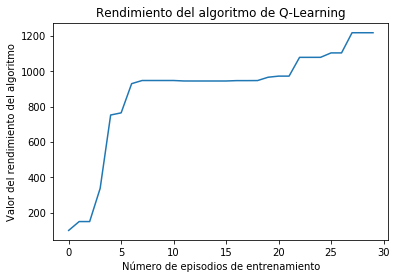

El algoritmo ha entrado en bucle al buscar un camino


In [56]:
def main(): 
    
    q, recompensas = ejecuta_QLearning()
    
if __name__ == "__main__": main()